# Градиентный спуск

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#init" data-toc-modified-id="init-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>init</a></span></li><li><span><a href="#single_variable" data-toc-modified-id="single_variable-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>single_variable</a></span></li><li><span><a href="#multiple-variable" data-toc-modified-id="multiple-variable-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>multiple variable</a></span><ul class="toc-item"><li><span><a href="#рисование" data-toc-modified-id="рисование-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>рисование</a></span></li><li><span><a href="#частная-производная" data-toc-modified-id="частная-производная-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>частная производная</a></span></li></ul></li></ul></div>

## init

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from random import uniform

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src import utils

In [4]:
# украшаем графики
plt.rcParams["figure.figsize"] = (17,8)
plt.style.use('ggplot')

In [5]:
RANDOM_SEED = 42

## single_variable

In [6]:
def single_variable_gradient_descent(func, domain_lim, derivative_func, learning_rate, 
                                     random_seed=0, max_steps=1000, round_ndigits=5):
    """Ищем минимум функции одной переменной градиентным спуском, рисуем результат.
    
    Используем простейшее условие для ранней остановки: если за max_steps шагов не нашли 
    минимум (точку, где значение производной = 0) - возвращаем то, что есть на данный момент.
    Также используем округление до round_ndigits'ого знака
    
    Args:
        func (Callable): функция, минимум которой ищем
        domain_lim (list): границы области определения, в которых ищем минимум
        derivative_func (Callable): производная func
        learning_rate (float): множитель для определения длины шага (через значение производной). >0!
        random_seed (int, optional): для воспроизводимости. Defaults to 0.
        max_steps (int, optional): кол-во шагов для ранней остановки. Defaults to 1000.
        round_ndigits (int, optional): до какого знака округляем. Defaults to 5.

    Returns:
        plt.axes: ax с графиком
        
    Todo:
        * при инициализации случайным числом, если значение производной = 0 нужно бы проверить, не 
          максимум ли это. А то там тоже будет производная 0, но выходить-то рано
        * при движении к минимуму стоит проверять, не выходим ли мы за границы domain_lim. И если
          выходим - возвращать границу из domain_lim. А то нечестно получается, не на заданном отрезке.
        * добавить возможность задать изначальное x. Ведь в некоторых случаях у нас есть baseline, и мы
          можем стартовать с него.
    """
    np.random.seed(seed=random_seed) # инициализируем генератор (псевдо)случайных чисел
    
    steps_counter = 0 # считаем шаги для ранней остановки
    history = [] # соберем историю для рисунка
    
    # изначально инициализируемся случайным числом
    x = np.random.choice(np.linspace(*domain_lim, num=1000))
    history.append([x, func(x)])
    
    while steps_counter < max_steps: # пока не дошли до условия ранней остановки
        # считаем значение производной
        derivative_value = derivative_func(x)
        
        if round(derivative_value, round_ndigits) == 0: # если 0 - выходим
            break
        else: # если нет - делаем шажок
            x = x - learning_rate * derivative_value
            history.append([x, func(x)])
            
        steps_counter += 1
    
    print(f"Сделано шагов: {len(history)}, найденное значение: {round(x, round_ndigits)}")
    history = np.array(history)
    
    # plot
    ax = utils.plot_single_variable_func(domain_lim, func, ax=None, label='func', color='blue')
    ax.plot(history[:, 0], history[:, 1], color='green', marker='o', label='steps')
    ax.axvline(x, color='red', label='min')
    ax.legend()
    plt.show();
    
    return pd.DataFrame(history, columns=['x', 'y']).round(round_ndigits) # здесь индекс - номер шага

Сделано шагов: 15, найденное значение: -0.0


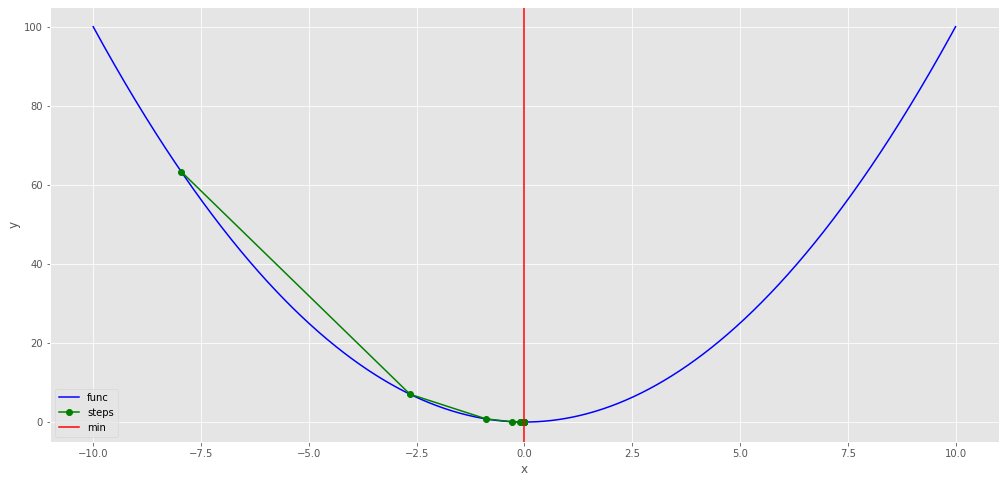

,x,y
10,-0.00013,0.0
11,-0.00004,0.0
12,-0.00001,0.0
13,-0.00000,0.0
14,-0.00000,0.0


In [7]:
func = lambda x: x**2
derivative_func = lambda x: 2*x

domain_lim = [-10,10]
learning_rate = 1/3 # с 1/2 за 1 шаг (после инициализации) находит (ну, если random_seed не менять)

history = single_variable_gradient_descent(func, domain_lim, derivative_func, learning_rate,
                                           random_seed=RANDOM_SEED)

history.tail()

## multiple variable

Для простоты зарисовки - случай с двумя переменными.

### рисование

In [8]:
def plot_surface(func):
    x = np.linspace(0, 100, 100).reshape(1, -1)
    y = np.linspace(0, 100, 100).reshape(1, -1)
    f = np.array([[func(x_i, y_j) for y_j in y[0]] for x_i in x[0]])

    layout = go.Layout(scene=dict(aspectmode='cube'))


    fig = go.Figure(data=[go.Surface(z=f)], layout=layout, )

    legend=dict(font=dict(size=12), x=0.45, y=0.95,)

    fig.update_layout(autosize=True,
                      width=800, height=500,
                      margin=dict(l=0, r=50, b=100, t=0),
                      legend=legend,
                      )
    
    return fig

In [9]:
def plot_gradient_descent_steps(fig, x_steps, y_steps, func_steps):
    steps = go.Scatter3d(x=x_steps,
                             y=y_steps,
                             z=func_steps,
                             mode='lines+markers',
                             marker=dict(
                                        size=5,
                                        color='red',
                                        colorscale='Viridis',
                             ),
                            line=dict(
                                color='red',
                                width=2
                            )
                        )
    fig.add_trace(steps)
    fig.show()
    return steps

### частная производная

In [10]:
def partial_derivative(f, x, i, dx=0.0001):
    """Считаем частную производную функции f в точке x по n-ной координате
    
    Приближенное вычисление на основе определения (но без предела): считаем отношение изменения 
    значения функции к изменению параметра.
    
    Args:
        f (Callable): для которой считаем производную
        x (list): координаты точки, в которой считаем производную
        i (int): индекс координаты, по которой считаем производную
        dx (float, optional): маленькое число, на которое изменяем x_i. Defaults to 0.0001

    Returns:
        float: значение частной производной в точке по i-той еоординате
    """
    original_value = f(*x)
    new_x = x.copy()
    new_x[i] = new_x[i] + dx
    new_value = f(*new_x)
    
    return (new_value - original_value) / dx

In [16]:
def grad_norm(grad):
    return (grad[0] ** 2 + grad[1] ** 2) ** (1/2)

In [11]:
f = lambda x, y: x**2 + y**2

print(f"частная производная f по x  в точке [1,1]: {partial_derivative(f, [1,1], 0)}")
print(f"частная производная f по y  в точке [5,5]: {partial_derivative(f, [5,5], 1)}")

частная производная f по x  в точке [1,1]: 2.000099999999172
частная производная f по y  в точке [5,5]: 10.000099999984968


In [34]:
def two_variable_gradient_descent(func, domain_lim,
                                  random_seed=0, learning_rate=0.1, max_steps=10000, round_ndigits=5):
    np.random.seed(seed=random_seed) # инициализируем генератор (псевдо)случайных чисел
    
    steps_counter = 0 # считаем шаги для ранней остановки
    history = [] # соберем историю для рисунка
    
    # изначально инициализируемся случайными числами
    x, y = np.random.choice(np.linspace(*domain_lim, num=1000), 2)
    history.append([x, y, func(x, y)])
    
    while steps_counter < max_steps: # пока не дошли до условия ранней остановки
        # считаем градиент
        grad = [
            partial_derivative(func, [x, y], 0),
            partial_derivative(func, [x, y], 1)
        ]
        
        # нам надо проверить, что дифференциал равен 0 (или близок к нему)
        # это будет тогда, когда каждая координата градиента достаточно близка к 0
        # сделаем так:
        differential = (grad[0]**2 + grad[1]**2)**2
        
        if round(differential, round_ndigits) == 0: # если 0 - выходим
            break
        else: # если нет - делаем шажок
            x -= learning_rate * grad[0]
            y -= learning_rate * grad[1]
            
            history.append([x, y, func(x, y)])
            
        steps_counter += 1
    
    print(
        f"Сделано шагов: {len(history)}, найденная точка: ({round(x, round_ndigits)}, {round(y, round_ndigits)})"
    )
    history = np.array(history)
    
    # plot
    fig = plot_surface(func)
    plot_gradient_descent_steps(fig, history[:, 0], history[:, 1], history[:, 2])
        
    return pd.DataFrame(history, columns=['x1', 'x2', 'y']).round(round_ndigits) # здесь индекс - номер шага

In [35]:
def func_1(x, y):
    # смещаем начало координат в точку (50, 50). чтобы поверхность отображалась в нужном месте
    x -= 50
    y -= 50
    
    return x ** 2 + y ** 2

plot_surface(func_1)

In [39]:
two_variable_gradient_descent(func_1, domain_lim=[0, 100], random_seed=42, 
                              learning_rate=0.2, max_steps=1000, round_ndigits=5)

Сделано шагов: 16, найденная точка: (49.98124, 49.99691)


,x1,x2,y
0,10.21021,43.54354,1624.91320
1,26.12611,46.12611,584.96986
2,35.67564,47.67564,210.58982
3,41.40537,48.60537,75.81273
4,44.84320,49.16320,27.29282
5,46.90590,49.49790,9.82556
6,48.14352,49.69872,3.53729
7,48.88609,49.81921,1.27348
8,49.33164,49.89151,0.45848
9,49.59896,49.93488,0.16507
